In [1]:
# 1. Imports & settings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
    RocCurveDisplay
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

RANDOM_STATE = 42

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)


In [2]:
# 3. Load dataset & initial exploration

DATA_URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv"

df = pd.read_csv(DATA_URL)

print("Shape:", df.shape)
df.head()


Shape: (19735, 29)


,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [3]:
# Basic info and descriptive statistics

df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [7]:
df.describe().T.head(15)
# Missing values check

,count,mean,std,min,25%,50%,75%,max
Appliances,19735.0,97.694958,102.524891,10.000000,50.000000,60.000000,100.000000,1080.000000
lights,19735.0,3.801875,7.935988,0.000000,0.000000,0.000000,0.000000,70.000000
T1,19735.0,21.686571,1.606066,16.790000,20.760000,21.600000,22.600000,26.260000
RH_1,19735.0,40.259739,3.979299,27.023333,37.333333,39.656667,43.066667,63.360000
T2,19735.0,20.341219,2.192974,16.100000,18.790000,20.000000,21.500000,29.856667
RH_2,19735.0,40.420420,4.069813,20.463333,37.900000,40.500000,43.260000,56.026667
T3,19735.0,22.267611,2.006111,17.200000,20.790000,22.100000,23.290000,29.236000
RH_3,19735.0,39.242500,3.254576,28.766667,36.900000,38.530000,41.760000,50.163333
T4,19735.0,20.855335,2.042884,15.100000,19.530000,20.666667,22.100000,26.200000
RH_4,19735.0,39.026904,4.341321,27.660000,35.530000,38.400000,42.156667,51.090000


In [5]:
df.isna().sum().sort_values(ascending=False).head(10)

,0
date,0
Appliances,0
lights,0
T1,0
RH_1,0
T2,0
RH_2,0
T3,0
RH_3,0
T4,0


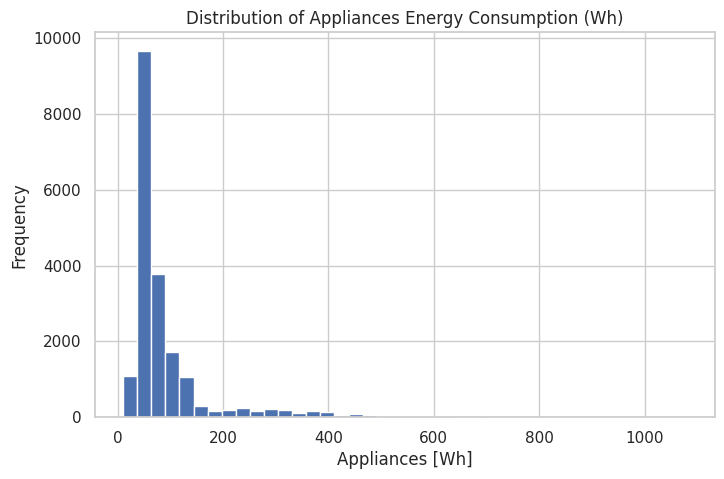

In [8]:
# Distribution of Appliances

plt.hist(df["Appliances"], bins=40)
plt.title("Distribution of Appliances Energy Consumption (Wh)")
plt.xlabel("Appliances [Wh]")
plt.ylabel("Frequency")
plt.show()

In [9]:
# Define binary target using 75th percentile as threshold

threshold = df["Appliances"].quantile(0.75)
threshold


np.float64(100.0)

In [10]:
df["high_consumption"] = (df["Appliances"] >= threshold).astype(int)

df["high_consumption"].value_counts(normalize=True)

,proportion
high_consumption,
0,0.735951
1,0.264049


In [27]:
# Drop non-needed columns for features

df_model = df.drop(columns=["date"])  # keep 'Appliances' for now, remove later if needed
df_model.head(200)

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,high_consumption
0,60,30,19.89,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,...,45.530000,6.600000,733.500000,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433,0
1,60,30,19.89,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,...,45.560000,6.483333,733.600000,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195,0
2,50,30,19.89,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,...,45.500000,6.366667,733.700000,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668,0
3,50,40,19.89,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,...,45.400000,6.250000,733.800000,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389,0
4,60,40,19.89,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,...,45.400000,6.133333,733.900000,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,40,0,19.29,43.590000,18.588889,43.590000,19.856667,44.863333,18.790000,43.900000,...,48.156667,5.300000,748.550000,89.500000,8.000000,24.000000,3.700000,29.528658,29.528658,0
196,40,0,19.29,43.590000,18.500000,43.590000,19.890000,44.900000,18.790000,43.900000,...,48.363333,5.300000,748.666667,90.000000,8.000000,23.000000,3.766667,5.518030,5.518030,0
197,50,0,19.29,43.700000,18.500000,43.635833,19.890000,44.900000,18.790000,43.933333,...,48.656667,5.300000,748.783333,90.500000,8.000000,22.000000,3.833333,42.025352,42.025352,0
198,40,0,19.29,43.760000,18.500000,43.686250,19.890000,44.900000,18.790000,44.000000,...,48.790000,5.300000,748.900000,91.000000,8.000000,21.000000,3.900000,15.898184,15.898184,0


In [12]:
# Simple correlation with the original Appliances (continuous)

corr_with_appliances = df_model.corr(numeric_only=True)["Appliances"].sort_values(ascending=False)
corr_with_appliances.head(15)

,Appliances
Appliances,1.000000
high_consumption,0.669631
lights,0.197278
T2,0.120073
T6,0.117638
T_out,0.099155
Windspeed,0.087122
RH_1,0.086031
T3,0.085060
T1,0.055447


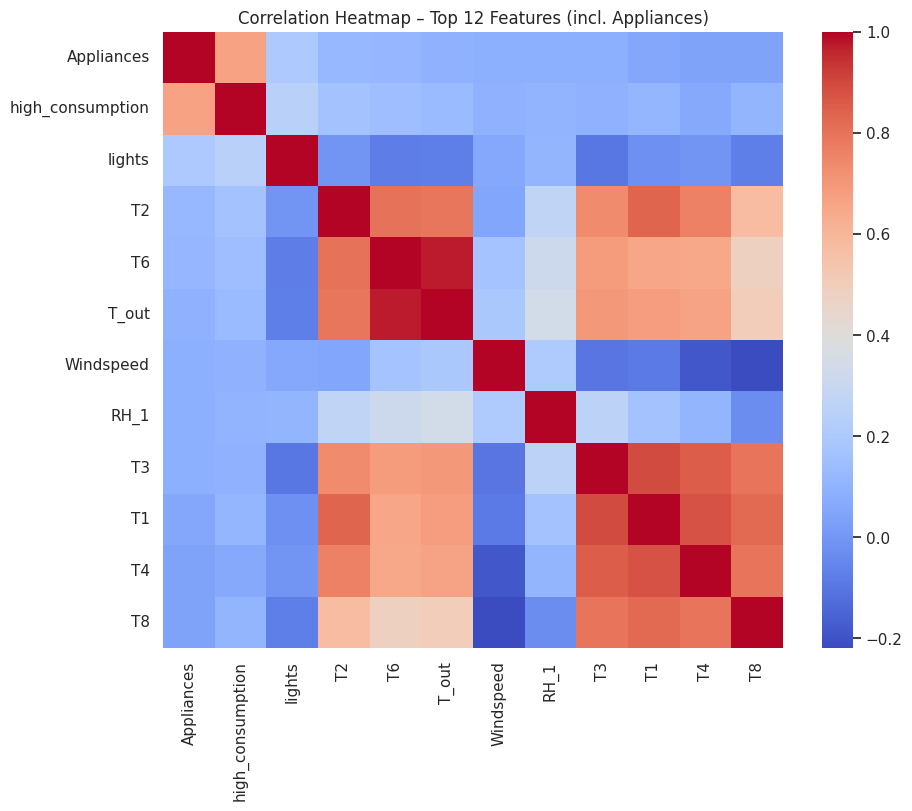

In [13]:
# Heatmap for top correlated features

top_features = corr_with_appliances.index[:12]

plt.figure(figsize=(10, 8))
sns.heatmap(df_model[top_features].corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap – Top 12 Features (incl. Appliances)")
plt.show()

In [14]:
X = df_model.drop(columns=["high_consumption"])  # features (Appliances still there but OK)
y = df_model["high_consumption"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=RANDOM_STATE
)

X_train.shape, X_test.shape

((15788, 28), (3947, 28))

In [15]:
from sklearn.base import BaseEstimator, TransformerMixin

# 5.2 Preprocessing pipeline components

scaler = StandardScaler()
selector = SelectKBest(score_func=f_classif, k=20)  # keep 20 best features
pca = PCA(n_components=5, random_state=RANDOM_STATE)

# This preprocessing pipeline will be used inside model-specific pipelines
preprocess_pipeline = Pipeline(
    steps=[
        ("scaler", scaler),
        ("selector", selector),
        ("pca", pca)
    ]
)


In [16]:
# 6.1 Logistic Regression pipeline

log_reg_clf = LogisticRegression(
    max_iter=1000,
    class_weight="balanced",
    random_state=RANDOM_STATE
)

log_reg_pipeline = Pipeline(
    steps=[
        ("preprocess", preprocess_pipeline),
        ("clf", log_reg_clf)
    ]
)

log_reg_param_grid = {
    "preprocess__selector__k": [10, 15, 20],
    "preprocess__pca__n_components": [3, 5, 7],
    "clf__C": [0.1, 1.0, 10.0]
}

log_reg_grid = GridSearchCV(
    log_reg_pipeline,
    param_grid=log_reg_param_grid,
    cv=5,
    scoring="f1",
    n_jobs=-1,
    verbose=1
)

log_reg_grid.fit(X_train, y_train)

print("Best Logistic Regression Params:", log_reg_grid.best_params_)
print("Best CV F1:", log_reg_grid.best_score_)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Logistic Regression Params: {'clf__C': 10.0, 'preprocess__pca__n_components': 7, 'preprocess__selector__k': 10}
Best CV F1: 0.9998801677651288


In [17]:
# 6.2 Random Forest pipeline

rf_clf = RandomForestClassifier(
    n_estimators=200,
    random_state=RANDOM_STATE,
    class_weight="balanced"
)

rf_pipeline = Pipeline(
    steps=[
        ("preprocess", preprocess_pipeline),
        ("clf", rf_clf)
    ]
)

rf_param_grid = {
    "preprocess__selector__k": [10, 15, 20],
    "preprocess__pca__n_components": [3, 5, 7],
    "clf__n_estimators": [100, 200],
    "clf__max_depth": [None, 10, 20],
    "clf__min_samples_split": [2, 5]
}

rf_grid = GridSearchCV(
    rf_pipeline,
    param_grid=rf_param_grid,
    cv=5,
    scoring="f1",
    n_jobs=-1,
    verbose=1
)

rf_grid.fit(X_train, y_train)

print("Best Random Forest Params:", rf_grid.best_params_)
print("Best CV F1:", rf_grid.best_score_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Random Forest Params: {'clf__max_depth': None, 'clf__min_samples_split': 2, 'clf__n_estimators': 200, 'preprocess__pca__n_components': 7, 'preprocess__selector__k': 10}
Best CV F1: 0.9754423034252758


In [18]:
# 7.1 Helper evaluation function

def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    print(f"=== {name} ===")
    print(f"Accuracy : {acc:.3f}")
    print(f"Precision: {prec:.3f}")
    print(f"Recall   : {rec:.3f}")
    print(f"F1-score : {f1:.3f}")
    print(f"ROC AUC  : {roc_auc:.3f}")
    print("\nClassification report:\n")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    return {
        "model": name,
        "accuracy": acc,
        "precision": prec,
        "recall": rec,
        "f1": f1,
        "roc_auc": roc_auc
    }


=== Logistic Regression ===
Accuracy : 1.000
Precision: 1.000
Recall   : 1.000
F1-score : 1.000
ROC AUC  : 1.000

Classification report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2905
           1       1.00      1.00      1.00      1042

    accuracy                           1.00      3947
   macro avg       1.00      1.00      1.00      3947
weighted avg       1.00      1.00      1.00      3947



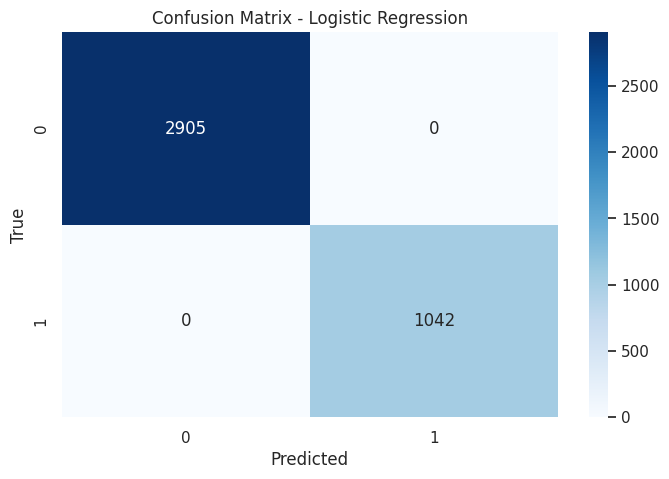

=== Random Forest ===
Accuracy : 0.991
Precision: 0.986
Recall   : 0.981
F1-score : 0.984
ROC AUC  : 1.000

Classification report:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2905
           1       0.99      0.98      0.98      1042

    accuracy                           0.99      3947
   macro avg       0.99      0.99      0.99      3947
weighted avg       0.99      0.99      0.99      3947



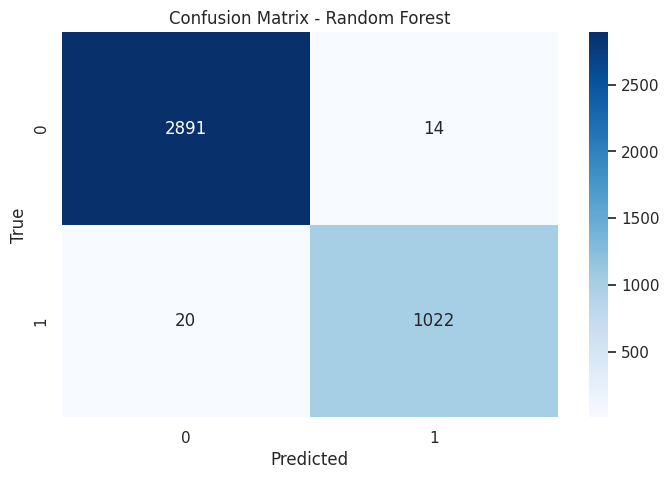

In [19]:
# 7.2 Evaluate best models on the test set

best_log_reg = log_reg_grid.best_estimator_
best_rf = rf_grid.best_estimator_

results_log_reg = evaluate_model("Logistic Regression", best_log_reg, X_test, y_test)
results_rf = evaluate_model("Random Forest", best_rf, X_test, y_test)


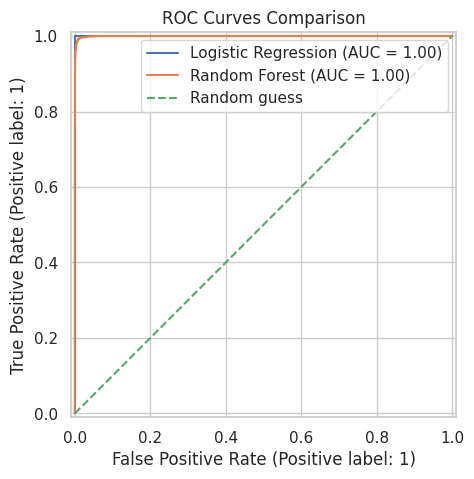

In [20]:
# 7.3 ROC curves comparison

fig, ax = plt.subplots()

RocCurveDisplay.from_estimator(
    best_log_reg, X_test, y_test, name="Logistic Regression", ax=ax
)
RocCurveDisplay.from_estimator(
    best_rf, X_test, y_test, name="Random Forest", ax=ax
)

plt.plot([0, 1], [0, 1], "--", label="Random guess")
plt.title("ROC Curves Comparison")
plt.legend()
plt.show()
